# Scipy 이용한 검정

In [48]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 10
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [3]:
sp.stats.binom_test(n, N)

0.34374999999999989

연습문제 1

In [12]:
sp.stats.binom_test(2 ,10)

0.10937500000000003

In [16]:
sp.stats.binom_test(8 ,10)

0.10937500000000003

1번 혹은 9번

연습문제 2

In [17]:
N = 100
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [29]:
sp.stats.binom_test(1, 100)

1.5934990285464443e-28

In [32]:
x_ls = []
for x in range(100):
    if sp.stats.binom_test(x, 100) < 0.01:
        x_ls.append(x)
    else:
        pass
print(x_ls)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


앞 면이 36번 이하 혹은 64번 이상 나온다면 동전이 fair하지 않다.

# 카이제곱 검정

카이제곱 분포를 띈다

# 단일표본 z 검정

통계청에서 z-test를 언급을 한다. 시험에서는 z-test로 문제를 내기 편하다. (degree of freedom이 없어서)


실제로는 t-test가 나온다.

In [40]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [41]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu)/ np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))


In [42]:
ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

# 단일 표본 t-검정

In [43]:
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.2894396723896699, pvalue=0.047818464908570578)

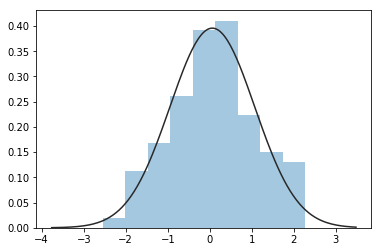

In [49]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

# 대응 표본 t-검정

# 등분산 검정 (중요)

# 정규성 검정 (매우중요) - normality test

정규분포를 띄는지 아닌지 검정을 하는 것이 매우 중요하다. 

정규검정 테스트 모두 다 외워야 한다. 

- Omnibus Normality test
- Jarque–Bera 
- Lilliefors test
- Kolmogorov-Smirnov test


- Shapiro–Wilk test
- Anderson–Darling test
- D'Agostino's K-squared test
- Kolmogorov-Smirnov test


    - Kolmogorov-Smirnov 검정은 사실 정규 분포에 국한되지 않고 두 샘플이 같은 분포를 따르는지 확인할 수 있는 방법이다.